In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import cnp


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
import utils
from gp_curves import GPCurvesGenerator

In [4]:
TRAINING_ITERATIONS = int(2e5)
MAX_CONTEXT_POINTS = 10
PLOT_AFTER = int(2e4)
tf.reset_default_graph()

In [5]:
dataset_train = GPCurvesGenerator(batch_size=64, max_size=MAX_CONTEXT_POINTS)
data_train = dataset_train.generate()

In [6]:
dataset_test = GPCurvesGenerator(batch_size=1, max_size=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate()

In [7]:
encoder_output_sizes = [128, 128, 128, 128]
decoder_output_sizes = [128, 128, 2]

model = cnp.ConditionalNP(encoder_output_sizes, decoder_output_sizes)

log_prob, _, _ = model(data_train.context,
                       data_train.query,
                       data_train.n_target,
                       data_train.target)

_, mu, sigma = model(data_test.context,
                     data_test.query,
                     data_test.n_target)

loss = -tf.reduce_mean(log_prob)
opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Iteration: 0, loss: 1.076511263847351


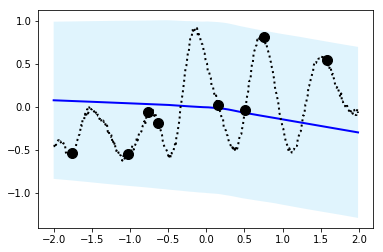

Iteration: 20000, loss: 0.17428527772426605


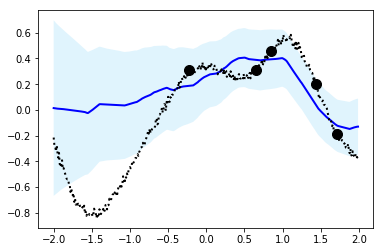

KeyboardInterrupt: 

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        sess.run(opt)
        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])

            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            utils.plot_func(query, target, cx, cy, pred, var)